In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

s1 = pd.read_csv('data/processed/s1.csv')
s2 = pd.read_csv('data/processed/s2.csv')

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

x, y = np.meshgrid(np.arange(1, 12), np.arange(1, 12))

label_to_color = {
    0 : 'tab:blue',
    1 : 'tab:green',
    2 : 'tab:orange',
    3 : 'tab:brown',
}

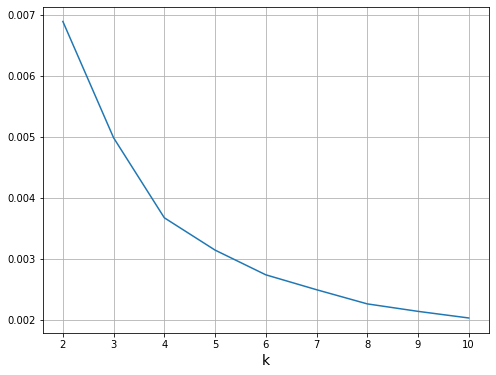

In [76]:
# already normalized, no more scaling required (?)
X = s2.values

distortions = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=10000, tol=1e-6, random_state=0).fit(X)
    distortions.append(kmeans.inertia_)
    
plt.plot(np.arange(2, 11), distortions)
plt.xlabel('k', fontsize=14)
plt.grid()

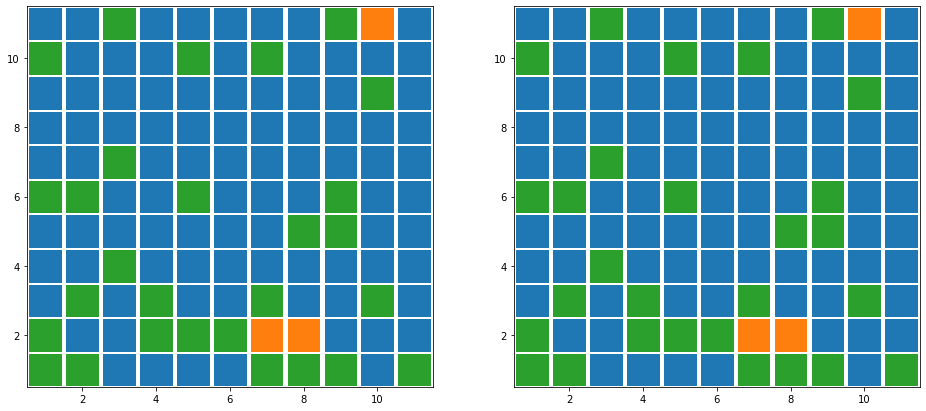

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

X = s2.values

kmeans = KMeans(n_clusters=3, max_iter=10000, tol=1e-6, random_state=0).fit(X)
labels = kmeans.predict(X)

colors = np.array([labels_to_colors[i] for i in labels])

ax1.scatter(x, y, c=colors, s=1000, marker='s')

X = s2.values

kmeans = KMeans(n_clusters=3, max_iter=10000, tol=1e-6, random_state=0).fit(X)
labels = kmeans.predict(X)

colors = np.array([labels_to_colors[i] for i in labels])
# oranges = np.where(colors == 'tab:blue')
# greens = np.where(colors == 'tab:orange')

# colors[oranges] = 'tab:orange'
# colors[greens] = 'tab:blue'

ax2.scatter(x, y, c=colors, s=1000, marker='s')

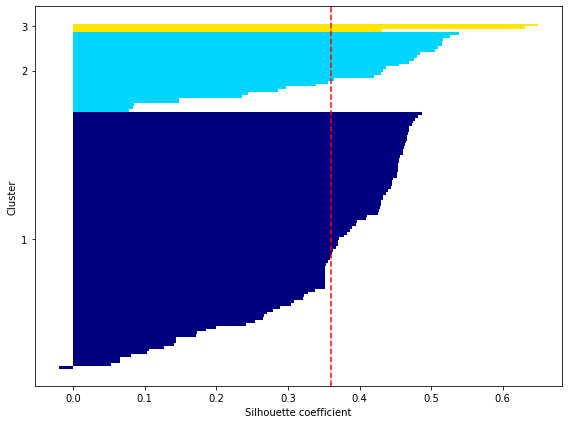

In [81]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):

    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()

    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, 
             height=1.0, edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

In [ ]:
distortions = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=10000, tol=1e-6, random_state=0).fit(X_transformed)
    distortions.append(kmeans.inertia_)
    
plt.plot(np.arange(2, 11), distortions)
plt.xlabel('k', fontsize=14)
plt.grid()

In [16]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

2 0.7306 0.02606 9.65648
3 0.69861 -0.10506 7.01633
4 0.89435 -0.12535 7.24393
5 0.72269 -0.13112 7.26466
6 1.03406 -0.13495 6.34135


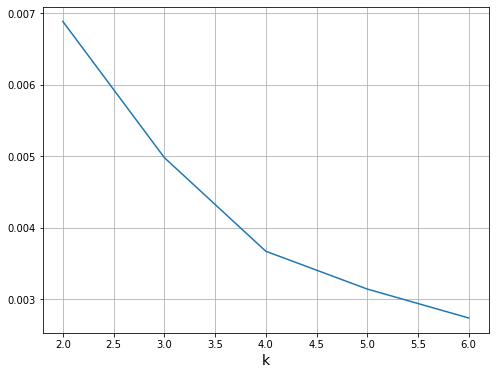

In [84]:
X = s2.values

# pca = PCA(n_components=0.95).fit(X)
# X = pca.transform(X)

distortions = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, max_iter=10000, tol=1e-6, random_state=0).fit(X)
    y_km = kmeans.labels_
    distortions.append(kmeans.inertia_)

    print(k, round(calinski_harabasz_score(s1.values, y_km), 5), 
             round(silhouette_score(s1.values, y_km), 5),
             round(davies_bouldin_score(s1.values, y_km), 5))
    
plt.plot(np.arange(2, 7), distortions)
plt.xlabel('k', fontsize=14)
plt.grid()

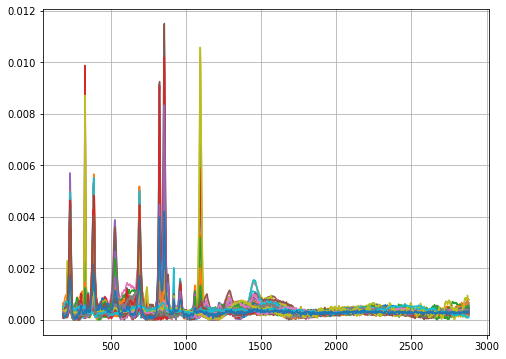

In [27]:
wn = list(map(int, s1.columns.to_list()))
for i in range(121):
    plt.plot(wn, X[i])
    
plt.grid()

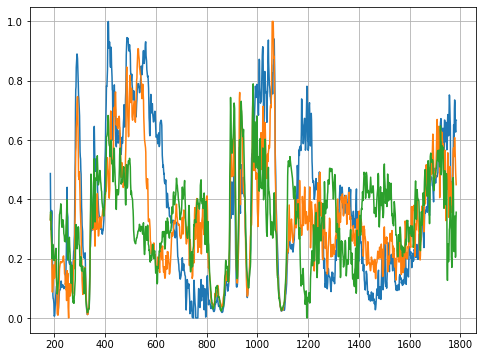

In [45]:
X = s1.values
X = MinMaxScaler().fit_transform(X)
plt.plot(wn[:1600], X[5][:1600], label='5')
plt.plot(wn[:1600], X[11][:1600], label='11')
plt.plot(wn[:1600], X[6][:1600], label='6')
plt.grid()